In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Model comparison

### Load data

Load data frames saved as CSV files, created using the test function provided in dino_utils.py, for example through the dino_paint.ipynb notebook or the dino_tests.py script.

In [2]:
models_with_scales_df = pd.read_csv("output/accuracies_231128010408_astro.csv", na_filter=False)

### View the data

In [4]:
models_with_scales_df

,Image,Annotated,DINOv2 Model,DINOv2 Layers,DINOv2 Scales,VGG16 Layers,VGG16 Scales,Accuracy,Execution Time
0,Test_Image,0.022018,None,x_norm_patchtokens,(),None,(),0.813362,2.457867
1,Test_Image,0.022018,None,x_norm_patchtokens,(),[0],(),0.809422,11.005656
2,Test_Image,0.022018,None,x_norm_patchtokens,(),[0],"[1.0, 1.32]",0.805450,14.910200
3,Test_Image,0.022018,None,x_norm_patchtokens,(),"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]",(),0.934433,44.369326
4,Test_Image,0.022018,None,x_norm_patchtokens,(),"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]","[1.0, 1.32]",0.931728,350.691465
5,Test_Image,0.022018,s,x_norm_patchtokens,(),None,(),0.963451,8.521216
6,Test_Image,0.022018,s,x_norm_patchtokens,(),[0],(),0.963764,8.272159
7,Test_Image,0.022018,s,x_norm_patchtokens,(),[0],"[1.0, 1.32]",0.959328,9.693471
8,Test_Image,0.022018,s,x_norm_patchtokens,(),"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]",(),0.968479,45.109589
9,Test_Image,0.022018,s,x_norm_patchtokens,(),"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]","[1.0, 1.32]",0.971035,328.797424


### Visualize the difference between models

Difference between using a DINOv2 model or not:

In [5]:
models_with_scales_df.groupby(['DINOv2 Model'])[['Accuracy', 'Execution Time']].describe()

Accuracy                                                    \
                count      mean       std       min       25%       50%   
DINOv2 Model                                                              
None              5.0  0.858879  0.067801  0.805450  0.809422  0.813362   
s                20.0  0.966799  0.003706  0.959328  0.963652  0.966684   

                                 Execution Time                          \
                   75%       max          count        mean         std   
DINOv2 Model                                                              
None          0.931728  0.934433            5.0   84.686903  149.535333   
s             0.969637  0.972759           20.0  111.770904  161.213912   

                                                                     
                   min        25%        50%        75%         max  
DINOv2 Model                                                         
None          2.457867  11.005656  14.910200  44.369326  350.691465  
s             8.272159  15.610708  46.413604  96.374621  543.451922

Difference between using the last vs. the last 4 layers:

In [15]:
models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers"])[["Accuracy", "Execution Time"]].mean()


Accuracy  Execution Time
DINOv2 Model DINOv2 Layers                               
None         x_norm_patchtokens  0.067801      149.535333
s            [8, 9, 10, 11]      0.002892      181.958794
             x_norm_patchtokens  0.004495      143.754911

In [18]:
models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers"])[["Accuracy", "Execution Time"]].std()

Accuracy  Execution Time
DINOv2 Model DINOv2 Layers                               
None         x_norm_patchtokens  0.067801      149.535333
s            [8, 9, 10, 11]      0.002892      181.958794
             x_norm_patchtokens  0.004495      143.754911

Difference between using all, none or the first layer of VGG16:

In [16]:

models_with_scales_df.groupby(["VGG16 Layers"])[["Accuracy", "Execution Time"]].mean()


,Accuracy,Execution Time
VGG16 Layers,,
None,0.935093,19.032495
"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]",0.962581,235.642506
[0],0.932909,20.726506


In [17]:
models_with_scales_df.groupby(["VGG16 Layers"])[["Accuracy", "Execution Time"]].std()

,Accuracy,Execution Time
VGG16 Layers,,
None,0.068061,21.979358
"[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]",0.015655,183.701062
[0],0.066213,14.673666


Plot differences when using different DINOv2 and VGG16 layers:

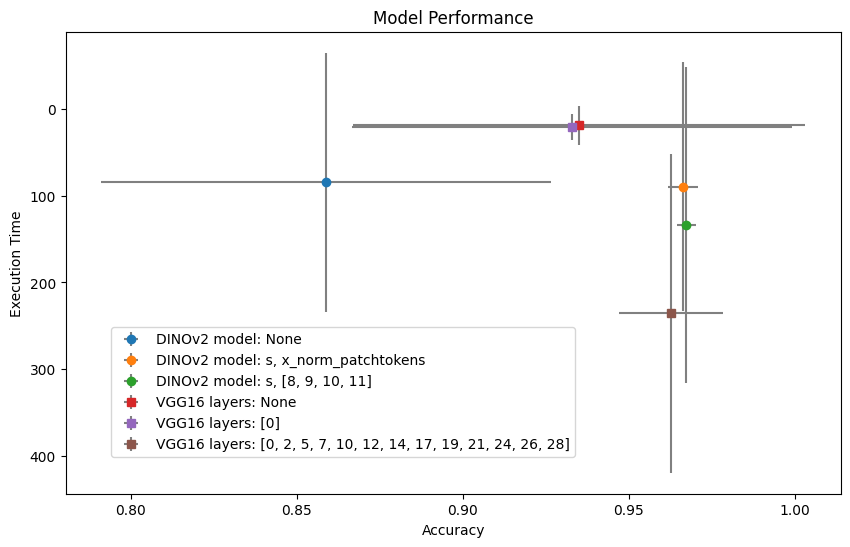

In [7]:
# Plot the mean accuracy and execution time for each group
fig, ax = plt.subplots(figsize=(10, 6))
labels = []

# Group the data by DINOv2 Model and DINOv2 Layers
grouped_dinov2 = models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers"], sort = False)
for name, group in grouped_dinov2:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].std()
    execution_time_var = group["Execution Time"].std()
    labels.append(f'DINOv2 model: {name[0]}{", " + str(name[1]) if name[0] != "None" else ""}')
    ax.errorbar(accuracy, execution_time, xerr=accuracy_var, yerr=execution_time_var, fmt='o', ecolor='grey')

# Group the data by VGG16 Layers
grouped_vgg = models_with_scales_df.groupby(["VGG16 Layers"], sort = False)
for name, group in grouped_vgg:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].std()
    execution_time_var = group["Execution Time"].std()
    labels.append(f'VGG16 layers: {name[0]}')
    ax.errorbar(accuracy, execution_time, xerr=accuracy_var, yerr=execution_time_var, fmt='s', ecolor='grey')

# Set the labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("Model Performance")

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(0.05, 0.22), labels = labels)

# Show the plot
plt.show()

### Visualize the difference between models additionally using different scalings

For DINOv2:

In [13]:
models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"])[["Accuracy", "Execution Time"]].mean()

Accuracy  Execution Time
DINOv2 Model DINOv2 Layers      DINOv2 Scales                          
None         x_norm_patchtokens ()             0.858879       84.686903
s            [8, 9, 10, 11]     ()             0.965667      103.103406
                                [1.0, 1.32]    0.968812      164.796685
             x_norm_patchtokens ()             0.965211       80.078772
                                [1.0, 1.32]    0.967504       99.104752

In [14]:
models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"])[["Accuracy", "Execution Time"]].std()

Accuracy  Execution Time
DINOv2 Model DINOv2 Layers      DINOv2 Scales                          
None         x_norm_patchtokens ()             0.067801      149.535333
s            [8, 9, 10, 11]     ()             0.002734      161.856950
                                [1.0, 1.32]    0.002273      214.286714
             x_norm_patchtokens ()             0.004594      139.923708
                                [1.0, 1.32]    0.004591      163.378185

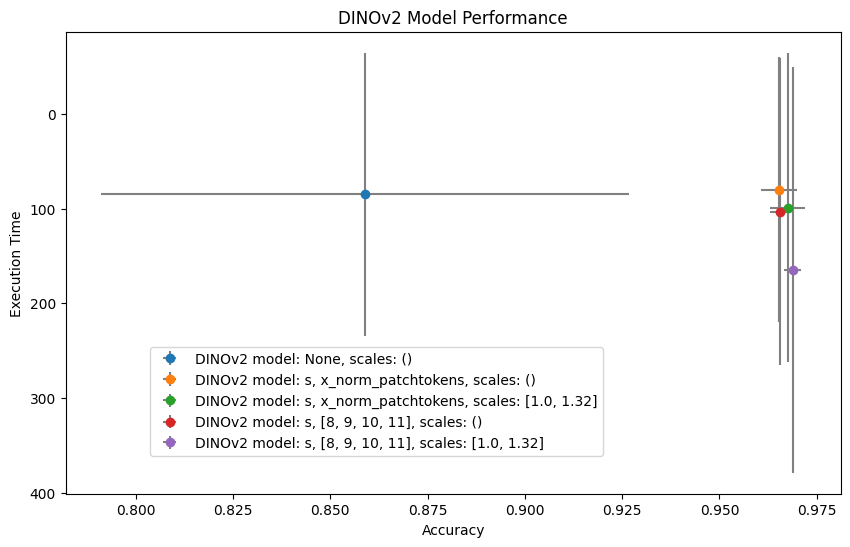

In [9]:
# Group the data by DINOv2 Model, DINOv2 Layers, and DINOv2 Scales
grouped_dinov2 = models_with_scales_df.groupby(["DINOv2 Model", "DINOv2 Layers", "DINOv2 Scales"], sort = False)

# Plot the mean accuracy and execution time for each group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped_dinov2:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].std()
    execution_time_var = group["Execution Time"].std()
    ax.errorbar(accuracy, execution_time, xerr=accuracy_var, yerr=execution_time_var, fmt='o', label=f'DINOv2 model: {name[0]}{", " + str(name[1]) if name[0] != "None" else ""}{", scales: " + str(name[2])}', ecolor='grey')

# Set the labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("DINOv2 Model Performance")

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(0.1, 0.2))

# Show the plot
plt.show()

For VGG16:

In [11]:
models_with_scales_df.groupby(["VGG16 Layers", "VGG16 Scales"])[["Accuracy", "Execution Time"]].mean()

Accuracy  \
VGG16 Layers                                     VGG16 Scales             
None                                             ()            0.935093   
[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28] ()            0.962581   
                                                 [1.0, 1.32]   0.962582   
[0]                                              ()            0.933310   
                                                 [1.0, 1.32]   0.932508   

                                                               Execution Time  
VGG16 Layers                                     VGG16 Scales                  
None                                             ()                 19.032495  
[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28] ()                 71.246642  
                                                 [1.0, 1.32]       400.038369  
[0]                                              ()                 19.996248  
                                                 [1.0, 1.32]        21.456763

In [12]:
models_with_scales_df.groupby(["VGG16 Layers", "VGG16 Scales"])[["Accuracy", "Execution Time"]].std()

Accuracy  \
VGG16 Layers                                     VGG16 Scales             
None                                             ()            0.068061   
[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28] ()            0.015896   
                                                 [1.0, 1.32]   0.017284   
[0]                                              ()            0.069283   
                                                 [1.0, 1.32]   0.071161   

                                                               Execution Time  
VGG16 Layers                                     VGG16 Scales                  
None                                             ()                 21.979358  
[0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28] ()                 35.750480  
                                                 [1.0, 1.32]        84.175906  
[0]                                              ()                 16.031008  
                                                 [1.0, 1.32]        15.037808

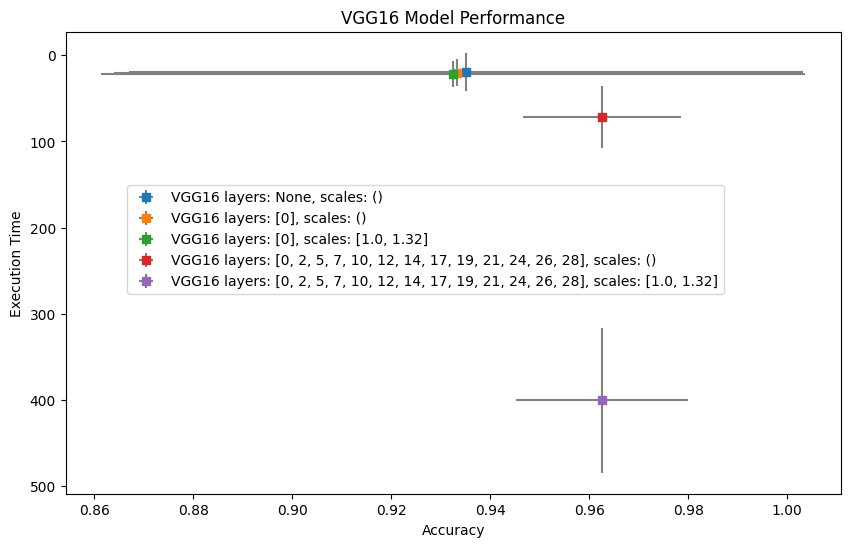

In [19]:
# Group the data by VGG16 Layers, and VGG16 Scales
grouped_vgg = models_with_scales_df.groupby(["VGG16 Layers", "VGG16 Scales"], sort = False)

# Plot the mean accuracy and execution time for each group
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in grouped_vgg:
    accuracy = group["Accuracy"].mean()
    execution_time = group["Execution Time"].mean()
    accuracy_var = group["Accuracy"].std()
    execution_time_var = group["Execution Time"].std()
    ax.errorbar(accuracy, execution_time, xerr=accuracy_var, yerr=execution_time_var, fmt='s', label=f'VGG16 layers: {name[0]}{", scales: " + str(name[1])}', ecolor='grey')

# Set the labels and title
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("VGG16 Model Performance")

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(0.07, 0.55))

# Show the plot
plt.show()

## VGG16 layers comparison

### Load data

Load data frames saved as CSV files, created using the test function provided in dino_utils.py, for example through the dino_paint.ipynb notebook or the dino_tests.py script.

In [20]:
test_df = pd.read_csv("output/accuracies_231117113937.csv", na_filter=False)
vgg_singles_df1 = pd.read_csv("output/accuracies_231128145539_astro_vgg16_singles.csv", na_filter=False)
vgg_singles_df2 = pd.read_csv("output/accuracies_231128152005_astro_vgg16_singles.csv", na_filter=False)
vgg_singles_df3 = pd.read_csv("output/accuracies_231128182700_astro_vgg16_singles.csv", na_filter=False)
vgg_cons_df1 = pd.read_csv("output/accuracies_231128152923_astro_vgg16_consecutives.csv", na_filter=False)
vgg_cons_df2 = pd.read_csv("output/accuracies_231128154821_astro_vgg16_consecutives.csv", na_filter=False)
vgg_cons_df3 = pd.read_csv("output/accuracies_231128175443_astro_vgg16_consecutives.csv", na_filter=False)
vgg_cons_df4 = pd.read_csv("output/accuracies_231128180417_astro_vgg16_consecutives.csv", na_filter=False)

### Consecutives

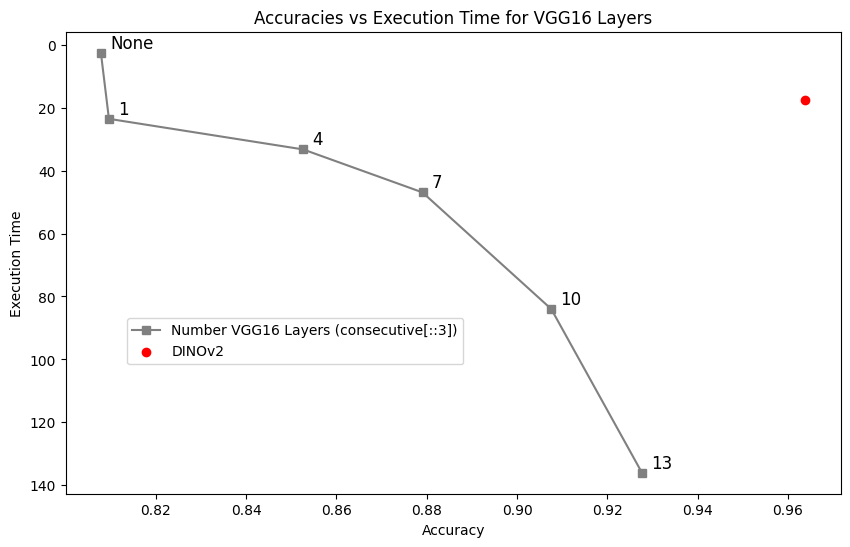

In [21]:
# Plot the accuracies vs execution time for each row in the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
vgg_cons = vgg_cons_df2
ax.plot(vgg_cons["Accuracy"], vgg_cons["Execution Time"], marker='s', linestyle='-', label="Number VGG16 Layers (consecutive[::3])", color='grey')
for i, layer in enumerate(vgg_cons["VGG16 Layers"]):
    # Add NUMBER of layers
    ax.text(vgg_cons["Accuracy"][i] + 0.002, vgg_cons["Execution Time"][i]-1.5, "None" if layer == "None" else len(layer.split(',')), fontsize=12, ha='left')
simple_dino = test_df[(test_df['DINOv2 Model'] == "s") & (test_df['DINOv2 Layers'] == "x_norm_patchtokens") & (test_df['DINOv2 Scales'] == "()") & (test_df['VGG16 Layers'] == "None") & (test_df['VGG16 Scales'] == "()")]
ax.scatter(simple_dino["Accuracy"], simple_dino["Execution Time"], color='red', label="DINOv2")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("Accuracies vs Execution Time for VGG16 Layers")
ax.legend(loc='center left', bbox_to_anchor=(0.07, 0.33))
plt.show()


### Singles

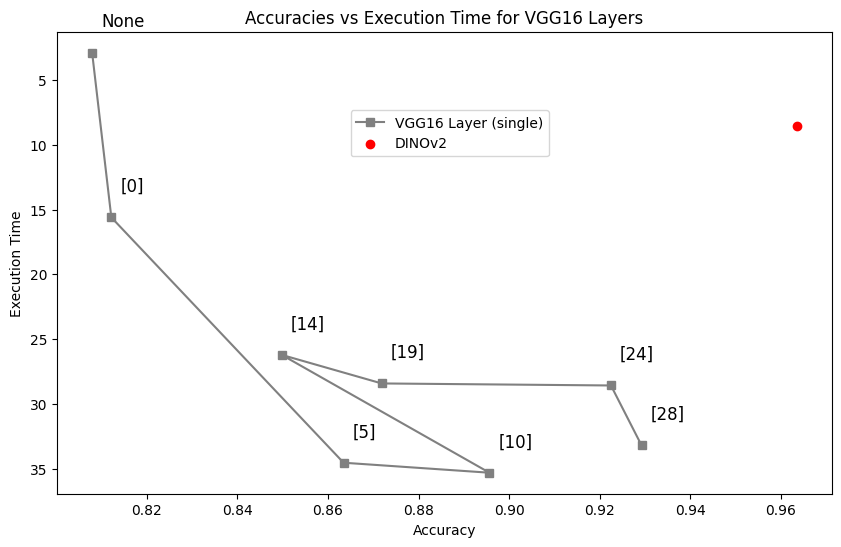

In [22]:
# Plot the accuracies vs execution time for each row in the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
vgg_singles = vgg_singles_df2
ax.plot(vgg_singles["Accuracy"], vgg_singles["Execution Time"], marker='s', linestyle='-', label="VGG16 Layer (single)", color='grey')
for i, layer in enumerate(vgg_singles["VGG16 Layers"]):
    # Add layer NAMES
    ax.text(vgg_singles["Accuracy"][i] + 0.002, vgg_singles["Execution Time"][i]-2, layer, fontsize=12, ha='left')
simple_dino = models_with_scales_df[(models_with_scales_df['DINOv2 Model'] == "s") & (models_with_scales_df['DINOv2 Layers'] == "x_norm_patchtokens") & (models_with_scales_df['DINOv2 Scales'] == "()") & (models_with_scales_df['VGG16 Layers'] == "None") & (models_with_scales_df['VGG16 Scales'] == "()")]
ax.scatter(simple_dino["Accuracy"], simple_dino["Execution Time"], color='red', label="DINOv2")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Execution Time")
ax.invert_yaxis()
ax.set_title("Accuracies vs Execution Time for VGG16 Layers")
ax.legend(loc='center left', bbox_to_anchor=(0.37, 0.78))
plt.show()



## Other visualizations (experimental)

In [ ]:
# for col in test_df.columns[:-2]:
#     print(f"\n", test_df.groupby(col)[["Accuracy", "Execution Time"]].mean())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by DINOv2 Model and DINOv2 Layers
grouped_dinov2 = test_df.groupby(["DINOv2 Model", "DINOv2 Layers"])

# Create a new DataFrame to store the accuracy data
accuracy_data = pd.DataFrame(columns=["DINOv2 Model", "DINOv2 Layers", "Accuracy"])

# Iterate over each group and extract the accuracy values
for name, group in grouped_dinov2:
    accuracy = group["Accuracy"].values
    model = name[0]
    layers = name[1]
    
    # Append the accuracy data to the new DataFrame
    accuracy_data = pd.concat([accuracy_data, pd.DataFrame({"DINOv2 Model": model, "DINOv2 Layers": layers, "Accuracy": accuracy})], ignore_index=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="DINOv2 Model", y="Accuracy", hue="DINOv2 Layers", data=accuracy_data)
sns.stripplot(x="DINOv2 Model", y="Accuracy", hue="DINOv2 Layers", data=accuracy_data, dodge=True, linewidth=1, edgecolor='gray', alpha=0.7)
sns.pointplot(x="DINOv2 Model", y="Accuracy", hue="DINOv2 Layers", data=accuracy_data, dodge=0.532, join=False, markers="d", scale=1, ci=None)
plt.xlabel("DINOv2 Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of DINOv2 Models and Layers")
plt.show()